## Machine Learning
#### K-means algorithm
*Look into heirarchical clustering

Check out later:
    https://scikit-learn.org/stable/auto_examples/cluster/plot_cluster_iris.html#sphx-glr-auto-examples-cluster-plot-cluster-iris-py

In [2]:
import math
import csv
import random
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d, Axes3D

def distance(x):
    #it shouldn't be less than 0 since I'm not getting any negative parallaxes from Gaia
    if x < 0:
        return 0
    else:
        return 1/x
def x(R, b, l):
    return R * math.cos(b) * math.cos(l)

def y(R, b, l):
    return R * math.cos(b) * math.sin(l)

def z(R, b):
    return R * math.sin(b)

def absmag(m, d):
    return (((math.log10(d) * 5)*-1)+5)+m

In [3]:
pleiades4 = pd.read_csv("pleiades_4_degrees.csv")
#pleiades4 = data_frame[['ra', 'dec', 'parallax', 'parallax_error', 'pmra', 'pmdec', 'b', 'l']]
pleiades4.loc[:, 'parallax_arcsec'] = pleiades4['parallax'].apply(lambda x: x*.001)
pleiades4.loc[:, 'R'] = pleiades4['parallax_arcsec'].apply(distance)
pleiades4.loc[:, 'x'] = pleiades4.apply(lambda r: x(r['R'], r['b'], r['l']), axis=1)
pleiades4.loc[:, 'y'] = pleiades4.apply(lambda r: y(r['R'], r['b'], r['l']), axis=1)
pleiades4.loc[:, 'z'] = pleiades4.apply(lambda r: z(r['R'], r['b']), axis=1)
pleiades4.loc[:, 'magnitude'] = pleiades4.apply(lambda x: absmag(x['phot_g_mean_mag'], x['R']), axis=1)

beehive3 = pd.read_csv("beehive3.csv")
#pleiades4 = data_frame[['ra', 'dec', 'parallax', 'parallax_error', 'pmra', 'pmdec', 'b', 'l']]
beehive3.loc[:, 'parallax_arcsec'] = beehive3['parallax'].apply(lambda x: x*.001)
beehive3.loc[:, 'R'] = beehive3['parallax_arcsec'].apply(distance)
beehive3.loc[:, 'x'] = beehive3.apply(lambda r: x(r['R'], r['b'], r['l']), axis=1)
beehive3.loc[:, 'y'] = beehive3.apply(lambda r: y(r['R'], r['b'], r['l']), axis=1)
beehive3.loc[:, 'z'] = beehive3.apply(lambda r: z(r['R'], r['b']), axis=1)
beehive3.loc[:, 'magnitude'] = beehive3.apply(lambda x: absmag(x['phot_g_mean_mag'], x['R']), axis=1)
beehive3

,solution_id,designation,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,...,lum_percentile_lower,lum_percentile_upper,datalink_url,epoch_photometry_url,parallax_arcsec,R,x,y,z,magnitude
0,1635721458409799680,Gaia DR2 659477217391773696,659477217391773696,689622068,2015.5,130.230299,0.027464,18.583010,0.018048,5.313191,...,0.108493,0.111901,http://geadata.esac.esa.int/data-server/datali...,NaN,0.005313,188.210821,128.820690,-22.574302,135.347493,7.554224
1,1635721458409799680,Gaia DR2 659489518178180864,659489518178180864,1611306417,2015.5,130.184818,0.045786,18.656469,0.028897,5.309375,...,0.250120,0.258365,http://geadata.esac.esa.int/data-server/datali...,NaN,0.005309,188.346080,127.864328,-35.766918,133.587751,6.262174
2,1635721458409799680,Gaia DR2 659494740858299264,659494740858299264,642953719,2015.5,130.121572,0.097391,18.796278,0.065595,5.498319,...,NaN,NaN,http://geadata.esac.esa.int/data-server/datali...,NaN,0.005498,181.873761,116.041503,-56.391099,128.189230,10.624763
3,1635721458409799680,Gaia DR2 659477865932633344,659477865932633344,210732194,2015.5,130.279972,1.310465,18.626705,0.709726,5.947697,...,NaN,NaN,http://geadata.esac.esa.int/data-server/datali...,NaN,0.005948,168.132299,107.204420,-21.943910,127.648530,14.511488
4,1635721458409799680,Gaia DR2 659485807326329600,659485807326329600,1629776767,2015.5,129.918981,0.120637,18.616257,0.081017,5.284283,...,NaN,NaN,http://geadata.esac.esa.int/data-server/datali...,NaN,0.005284,189.240429,153.433612,-53.312623,97.097017,10.698027
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1267,1635721458409799680,Gaia DR2 665454368759275520,665454368759275520,1001337653,2015.5,128.557705,0.149214,21.397790,0.089588,4.964799,...,NaN,NaN,http://geadata.esac.esa.int/data-server/datali...,NaN,0.004965,201.418006,-136.122823,136.127388,59.237865,10.734773
1268,1635721458409799680,Gaia DR2 665451860498377088,665451860498377088,1362752145,2015.5,128.536385,0.061445,21.320897,0.041051,5.880749,...,NaN,NaN,http://geadata.esac.esa.int/data-server/datali...,NaN,0.005881,170.046365,-125.026533,107.035715,42.749129,9.135654
1269,1635721458409799680,Gaia DR2 665549339075127552,665549339075127552,1024171630,2015.5,128.663248,0.049595,21.492953,0.029664,6.390629,...,11.770558,12.089551,http://geadata.esac.esa.int/data-server/datali...,NaN,0.006391,156.479113,-93.910441,107.440850,64.210633,1.967158
1270,1635721458409799680,Gaia DR2 665454364462163072,665454364462163072,320865889,2015.5,128.559575,0.800033,21.388191,0.487154,4.657021,...,NaN,NaN,http://geadata.esac.esa.int/data-server/datali...,NaN,0.004657,214.729539,-146.822875,143.540575,62.832488,13.611226


In [16]:
#train = pleiades4.head(len(pleiades4)*.8)
#test = pleiades4.tail(len(pleiades4)*.2)

#weighted fractions
#from sklearn.cluster import KMeans

# create kmeans object, 2 clusters
#kmeans = KMeans(n_clusters=2)
# fit kmeans object to data
#kmeans.fit(train.values) #X = data set excluding name of galaxy
# save new clusters for chart
#y_km = kmeans.predict(train.values) #or fit_predict

#.values - changes pandas dataframe to numpy array
#plt.scatter(train.values[:, 0], train.values[:, 1], c=y_km, s=50, cmap='viridis')

#centers = kmeans.cluster_centers_
#plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)

In [25]:
np.random.seed(42)

p = pleiades4[['ra', 'dec', 'pmra', 'pmdec', 'b', 'l', 'R', 'x', 'y', 'z']]
b = beehive3[['ra', 'dec', 'pmra', 'pmdec', 'b', 'l', 'R', 'x', 'y', 'z']]
frames = [p, b]
df = pd.concat(frames)

def process():
    data = scale(df)
    n_samples, n_features = data.shape
    print("n_samples %d, \t n_features %d"
              % (n_samples, n_features))
    return data

def kmeans(estimator, name, data):
    estimator.fit(data)

In [26]:
data = process()
kmeans(KMeans(init='k-means++', n_clusters=2, n_init=10),
                  name="k-means++", data=data)

kmeans(KMeans(init='random', n_clusters=2, n_init=10),
              name="random", data=data)


n_samples 2623, 	 n_features 10


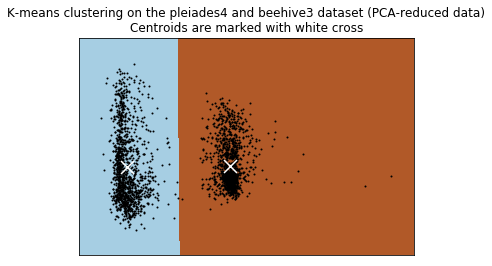

In [27]:
# in this case the seeding of the centers is deterministic, hence we run the
# kmeans algorithm only once with n_init=1
pca = PCA(n_components=2).fit(data)
kmeans(KMeans(init=pca.components_, n_clusters=2, n_init=1),
              name="PCA-based",
              data=data)

reduced_data = PCA(n_components=2).fit_transform(data)
km = KMeans(init='k-means++', n_clusters=2, n_init=10)
km.fit(reduced_data)

# Step size of the mesh. Decrease to increase the quality of the VQ.
h = .02  # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = km.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
# Plot the centroids as a white X
centroids = km.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.title('K-means clustering on the pleiades4 and beehive3 dataset (PCA-reduced data)\n'
          'Centroids are marked with white cross')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

In [28]:
from sklearn.cluster import KMeans

# Number of clusters
kmeans = KMeans(n_clusters=3)
# Fitting the input data
kmeans = kmeans.fit(data)
# Getting the cluster labels
labels = kmeans.predict(data)
# Centroid values
centroids = kmeans.cluster_centers_

print(centroids)

[[-0.96862384  0.89267696  0.65656893 -0.49469924 -0.96844381 -0.96778877
  -0.84254269 -0.0177846   0.21883703 -0.2393799 ]
 [ 1.0128677  -1.13387673 -0.6778411   0.51740152  1.00481212  1.04061478
   0.93902708  0.26345339 -1.49545513 -0.82127869]
 [ 1.03929407 -0.85532968 -0.70892928  0.53073807  1.04312344  1.02376464
   0.87435919 -0.10611198  0.41281574  0.80474608]]


### Below, plotted RA and DEC and b and l
Will be finding clusters from there before moving on to 3 dimensions
#### using k means algorithm tutorial: http://benalexkeen.com/k-means-clustering-in-python/
* Initialisation – K initial “means” (centroids) are generated at random
* Assignment – K clusters are created by associating each observation with the nearest centroid
* Update – The centroid of the clusters becomes the new mean


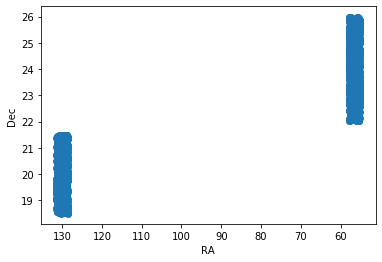

In [29]:
plt.scatter(df['ra'], df['dec'])
plt.gca().invert_xaxis()
plt.xlabel("RA")
plt.ylabel("Dec")
plt.show()

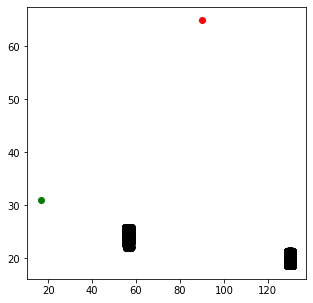

In [41]:
data = df[['ra', 'dec']]
np.random.seed(500)
k = 2
# centroids[i] = [x, y]
centroids = {
    i+1: [np.random.randint(0, 140), np.random.randint(0, 140)]
    for i in range(k)
}

fig = plt.figure(figsize=(5, 5))
plt.scatter(data['ra'], data['dec'], color='k')
colmap = {1: 'r', 2: 'g', 3: 'b'}
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.show()

          ra        dec  distance_from_1  distance_from_2  closest color
0  56.583196  25.475364        51.757894        39.966874        2     g
1  56.156051  25.137591        52.291725        39.592476        2     g
2  56.214727  25.087781        52.291777        39.657902        2     g
3  56.134121  25.136601        52.306676        39.570935        2     g
4  56.316027  25.109959        52.209438        39.754781        2     g


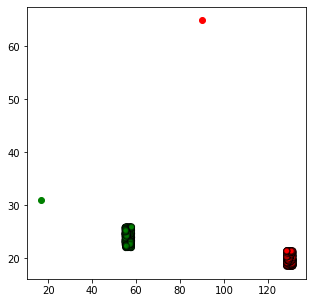

In [43]:
## Assignment Stage
from ipykernel import kernelapp as app

def assignment(df, centroids):
    for i in centroids.keys():
        # sqrt((x1 - x2)^2 - (y1 - y2)^2)
        data['distance_from_{}'.format(i)] = (
            np.sqrt(
                (df['ra'] - centroids[i][0]) ** 2
                + (df['dec'] - centroids[i][1]) ** 2
            )
        )
    centroid_distance_cols = ['distance_from_{}'.format(i) for i in centroids.keys()]
    df['closest'] = df.loc[:, centroid_distance_cols].idxmin(axis=1)
    df['closest'] = df['closest'].map(lambda x: int(x.lstrip('distance_from_')))
    df['color'] = df['closest'].map(lambda x: colmap[x])
    return df

data = assignment(data, centroids)
print(data.head())

fig = plt.figure(figsize=(5, 5))
plt.scatter(data['ra'], data['dec'], color=data['color'], alpha=0.5, edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.show()

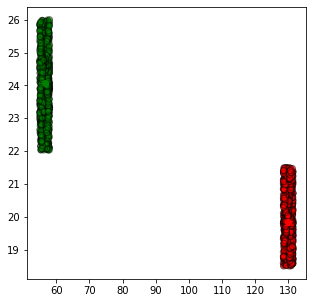

In [45]:
## Update Stage

import copy

old_centroids = copy.deepcopy(centroids)

def update(k):
    for i in centroids.keys():
        centroids[i][0] = np.mean(df[df['closest'] == i]['ra'])
        centroids[i][1] = np.mean(df[df['closest'] == i]['dec'])
    return k

centroids = update(centroids)
    
fig = plt.figure(figsize=(5, 5))
ax = plt.axes()
plt.scatter(data['ra'], data['dec'], color=data['color'], alpha=0.5, edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
for i in old_centroids.keys():
    old_ra = old_centroids[i][0]
    old_dec = old_centroids[i][1]
    dra = (centroids[i][0] - old_centroids[i][0]) * 0.75
    ddec = (centroids[i][1] - old_centroids[i][1]) * 0.75
    ax.arrow(old_ra, old_dec, dra, ddec, head_width=2, head_length=3, fc=colmap[i], ec=colmap[i])
plt.show()

In [48]:
data2 = df[['ra', 'dec']]
from sklearn.cluster import KMeans

#fit to the data
kmeans = KMeans(n_clusters=2)
kmeans.fit(data2)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [60]:
#learn the labels
labels = kmeans.predict(data2)
centroids = kmeans.cluster_centers_
centroids

array([[ 56.56454553,  24.06039959],
       [130.00189746,  19.85581862]])

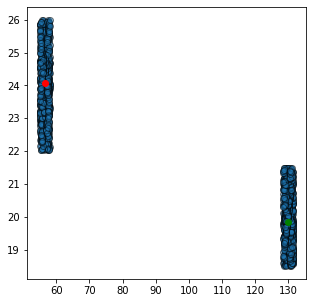

In [58]:
fig = plt.figure(figsize=(5, 5))

colors = map(lambda x: colmap[x+1], labels)

#plot it
plt.scatter(data2['ra'], data2['dec'], alpha=0.5, edgecolor='k') #colors=colors didn't work

#plots centroids to respective centers
for idx, centroid in enumerate(centroids):
    plt.scatter(*centroid, color=colmap[idx+1])
    
plt.show()

Important points
* normalize data - due to Euclidean distance between k means clusters
* symmetries in your data = some of the labels may be mis-labelled
* repeat - do the same k-means with different initial centroids and take the most common label

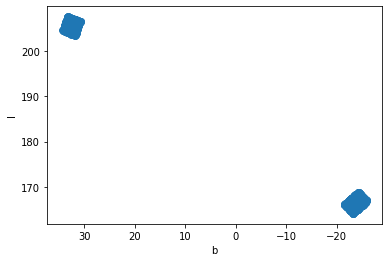

In [38]:
plt.scatter(df['b'], df['l'])
plt.gca().invert_xaxis()
plt.xlabel("b")
plt.ylabel("l")
plt.show()